In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('img.png')

In [3]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [4]:
img.shape

(648, 1152, 3)

In [5]:
b = img[:,:,0]

In [6]:
print(b)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [7]:
g = img[:,:,1]

In [8]:
r = img[:,:,2]

In [9]:
g

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
r

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

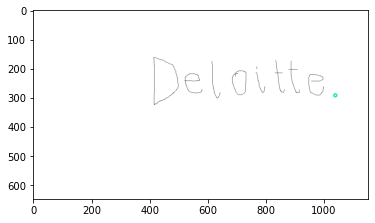

In [11]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

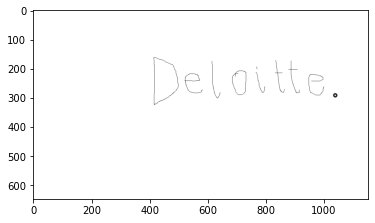

In [12]:
plt.imshow(b, cmap="gray")
plt.show()

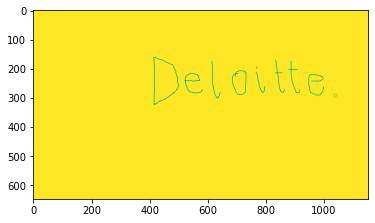

In [13]:
plt.imshow(g)
plt.show()

In [14]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

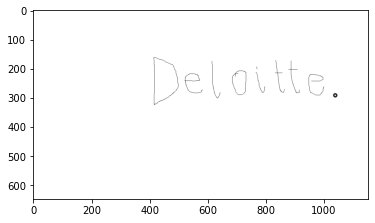

In [15]:
plt.imshow(b, cmap="gray")
plt.show()

In [16]:
# Blur the image for better edge detection
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

In [17]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

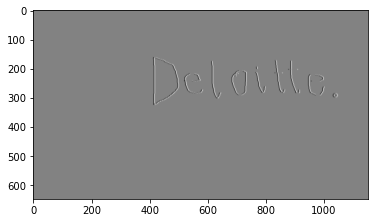

In [18]:
plt.imshow(sobelx, cmap="gray")
plt.show()

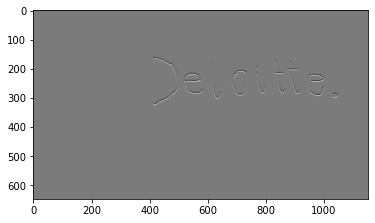

In [19]:
plt.imshow(sobely, cmap="gray")
plt.show()

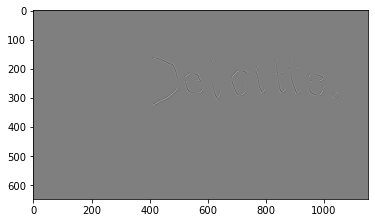

In [20]:
plt.imshow(sobelxy, cmap="gray")
plt.show()

In [21]:
import os
import shutil

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(6, (3, 3), strides=(1, 1), activation='relu', input_shape=(20, 20, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(6, (3, 3), activation='relu'))

model.add(layers.Flatten())


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 6)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 6)           330       
_________________________________________________________________
flatten (Flatten)            (None, 294)               0         
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2 = models.Sequential()
model2.add(layers.Conv2D(9, (3, 3), strides=(1, 1), activation='relu', input_shape=(20, 20, 3)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model2.add(layers.Conv2D(9, (3, 3), activation='relu'))

model2.add(layers.Flatten())

In [31]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 18, 18, 9)         252       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 9)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 9)           738       
_________________________________________________________________
flatten_2 (Flatten)          (None, 441)               0         
Total params: 990
Trainable params: 990
Non-trainable params: 0
_________________________________________________________________


In [32]:
model3 = models.Sequential()
model3.add(layers.Conv2D(6, (3, 3), strides=(1, 1), activation='relu', input_shape=(20, 20, 3), padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model3.add(layers.Conv2D(5, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model3.add(layers.Flatten())
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 20, 6)         168       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 5)         275       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 125)               0         
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.add(Dense(20, activation='relu'))
model2.add(Dense(3))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 18, 18, 9)         252       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 9)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 9)           738       
_________________________________________________________________
flatten_2 (Flatten)          (None, 441)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                8840      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 9,893
Trainable params: 9,893
Non-trainable params: 0
____________________________________________________

In [35]:
data_dir = 'digits'
img_height, img_width = 20, 20
batch_size=10

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 3 classes.
Using 6 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3']


(6, 20, 20, 3) tf.Tensor([0 1 2 1 1 0], shape=(6,), dtype=int32)


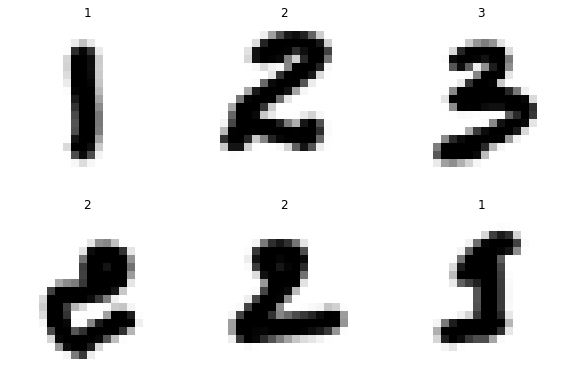

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(images.shape, labels)
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [38]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(6, 20, 20, 3)
(6,)


In [43]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [47]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [49]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
history = model2.fit(train_ds, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 428ms/step - loss: 240.0455 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 121.2059 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 51.7445 - accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 60.0134 - accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 0s 14ms/step - loss: 70.8663 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 58.1425 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 33.6030 - accuracy: 0.3333
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 34.0782 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 29.7335 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 17.9904 - accuracy: 0.5000
Epoch 11/20
1/1 [=

In [88]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()


In [89]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [90]:
# one hot encode target values
trainy = tf.keras.utils.to_categorical(trainy)
testy = tf.keras.utils.to_categorical(testy)

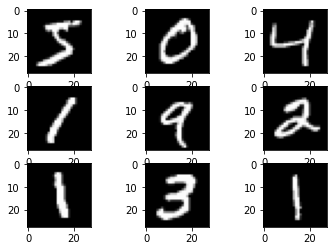

In [91]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [92]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(Dense(40, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 40)                32040     
_________________________________________________________________
dense_30 (Dense)             (None, 20)              

In [93]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# change test and train y values to  Categorical
history = model3.fit(trainX, trainy, epochs=50, 
                    validation_data=(testX, testy))

Epoch 1/50
1875/1875 [==============================] - 58s 30ms/step - loss: 0.2548 - accuracy: 0.9282 - val_loss: 0.0850 - val_accuracy: 0.9756
Epoch 2/50
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0781 - accuracy: 0.9776 - val_loss: 0.0530 - val_accuracy: 0.9828
Epoch 3/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 4/50
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0550 - val_accuracy: 0.9841
Epoch 5/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0413 - val_accuracy: 0.9873
Epoch 6/50
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 7/50
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0529 -

313/313 - 3s - loss: 27.3482 - accuracy: 0.1138


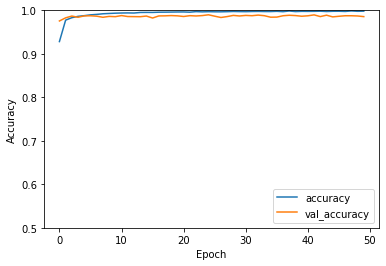

In [103]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX, testy, verbose=2)